<a href="https://colab.research.google.com/github/jha-mona/ml-pca-project/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task
  How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.


Note : Use KNN for Classification

Data Link : [Wine Data](https://colab.research.google.com/drive/19AtHlobDsFzsOSXKl8K9qlsqNu2McXza#scrollTo=HgJ-b41rjVas&line=1&uniqifier=1)

In [26]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)


In [27]:
wine.head(10)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6  
5       0.44     10.1        6  
6       0.47      9.6        6  
7       0.45      8.8        6  
8       0.49      9.5        6  
9       0.45     11.0        6

In [28]:
wine.type.value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [29]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [30]:
wine['type'] = wine['type'].apply(lambda x : 0 if x  == 'red' else 1)

In [31]:
wine.type.value_counts()

type
1    4898
0    1599
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

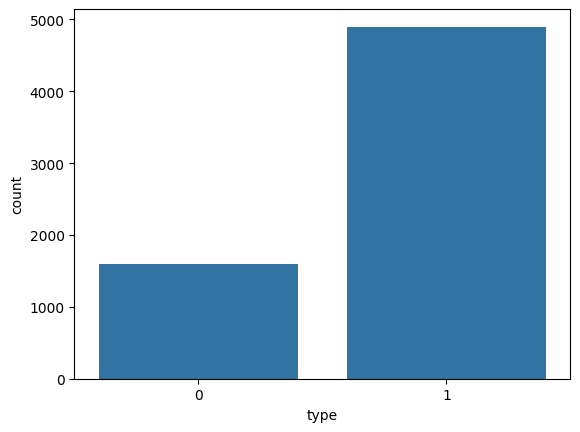

In [74]:
import seaborn as sns
sns.countplot(x='type' , data = wine)

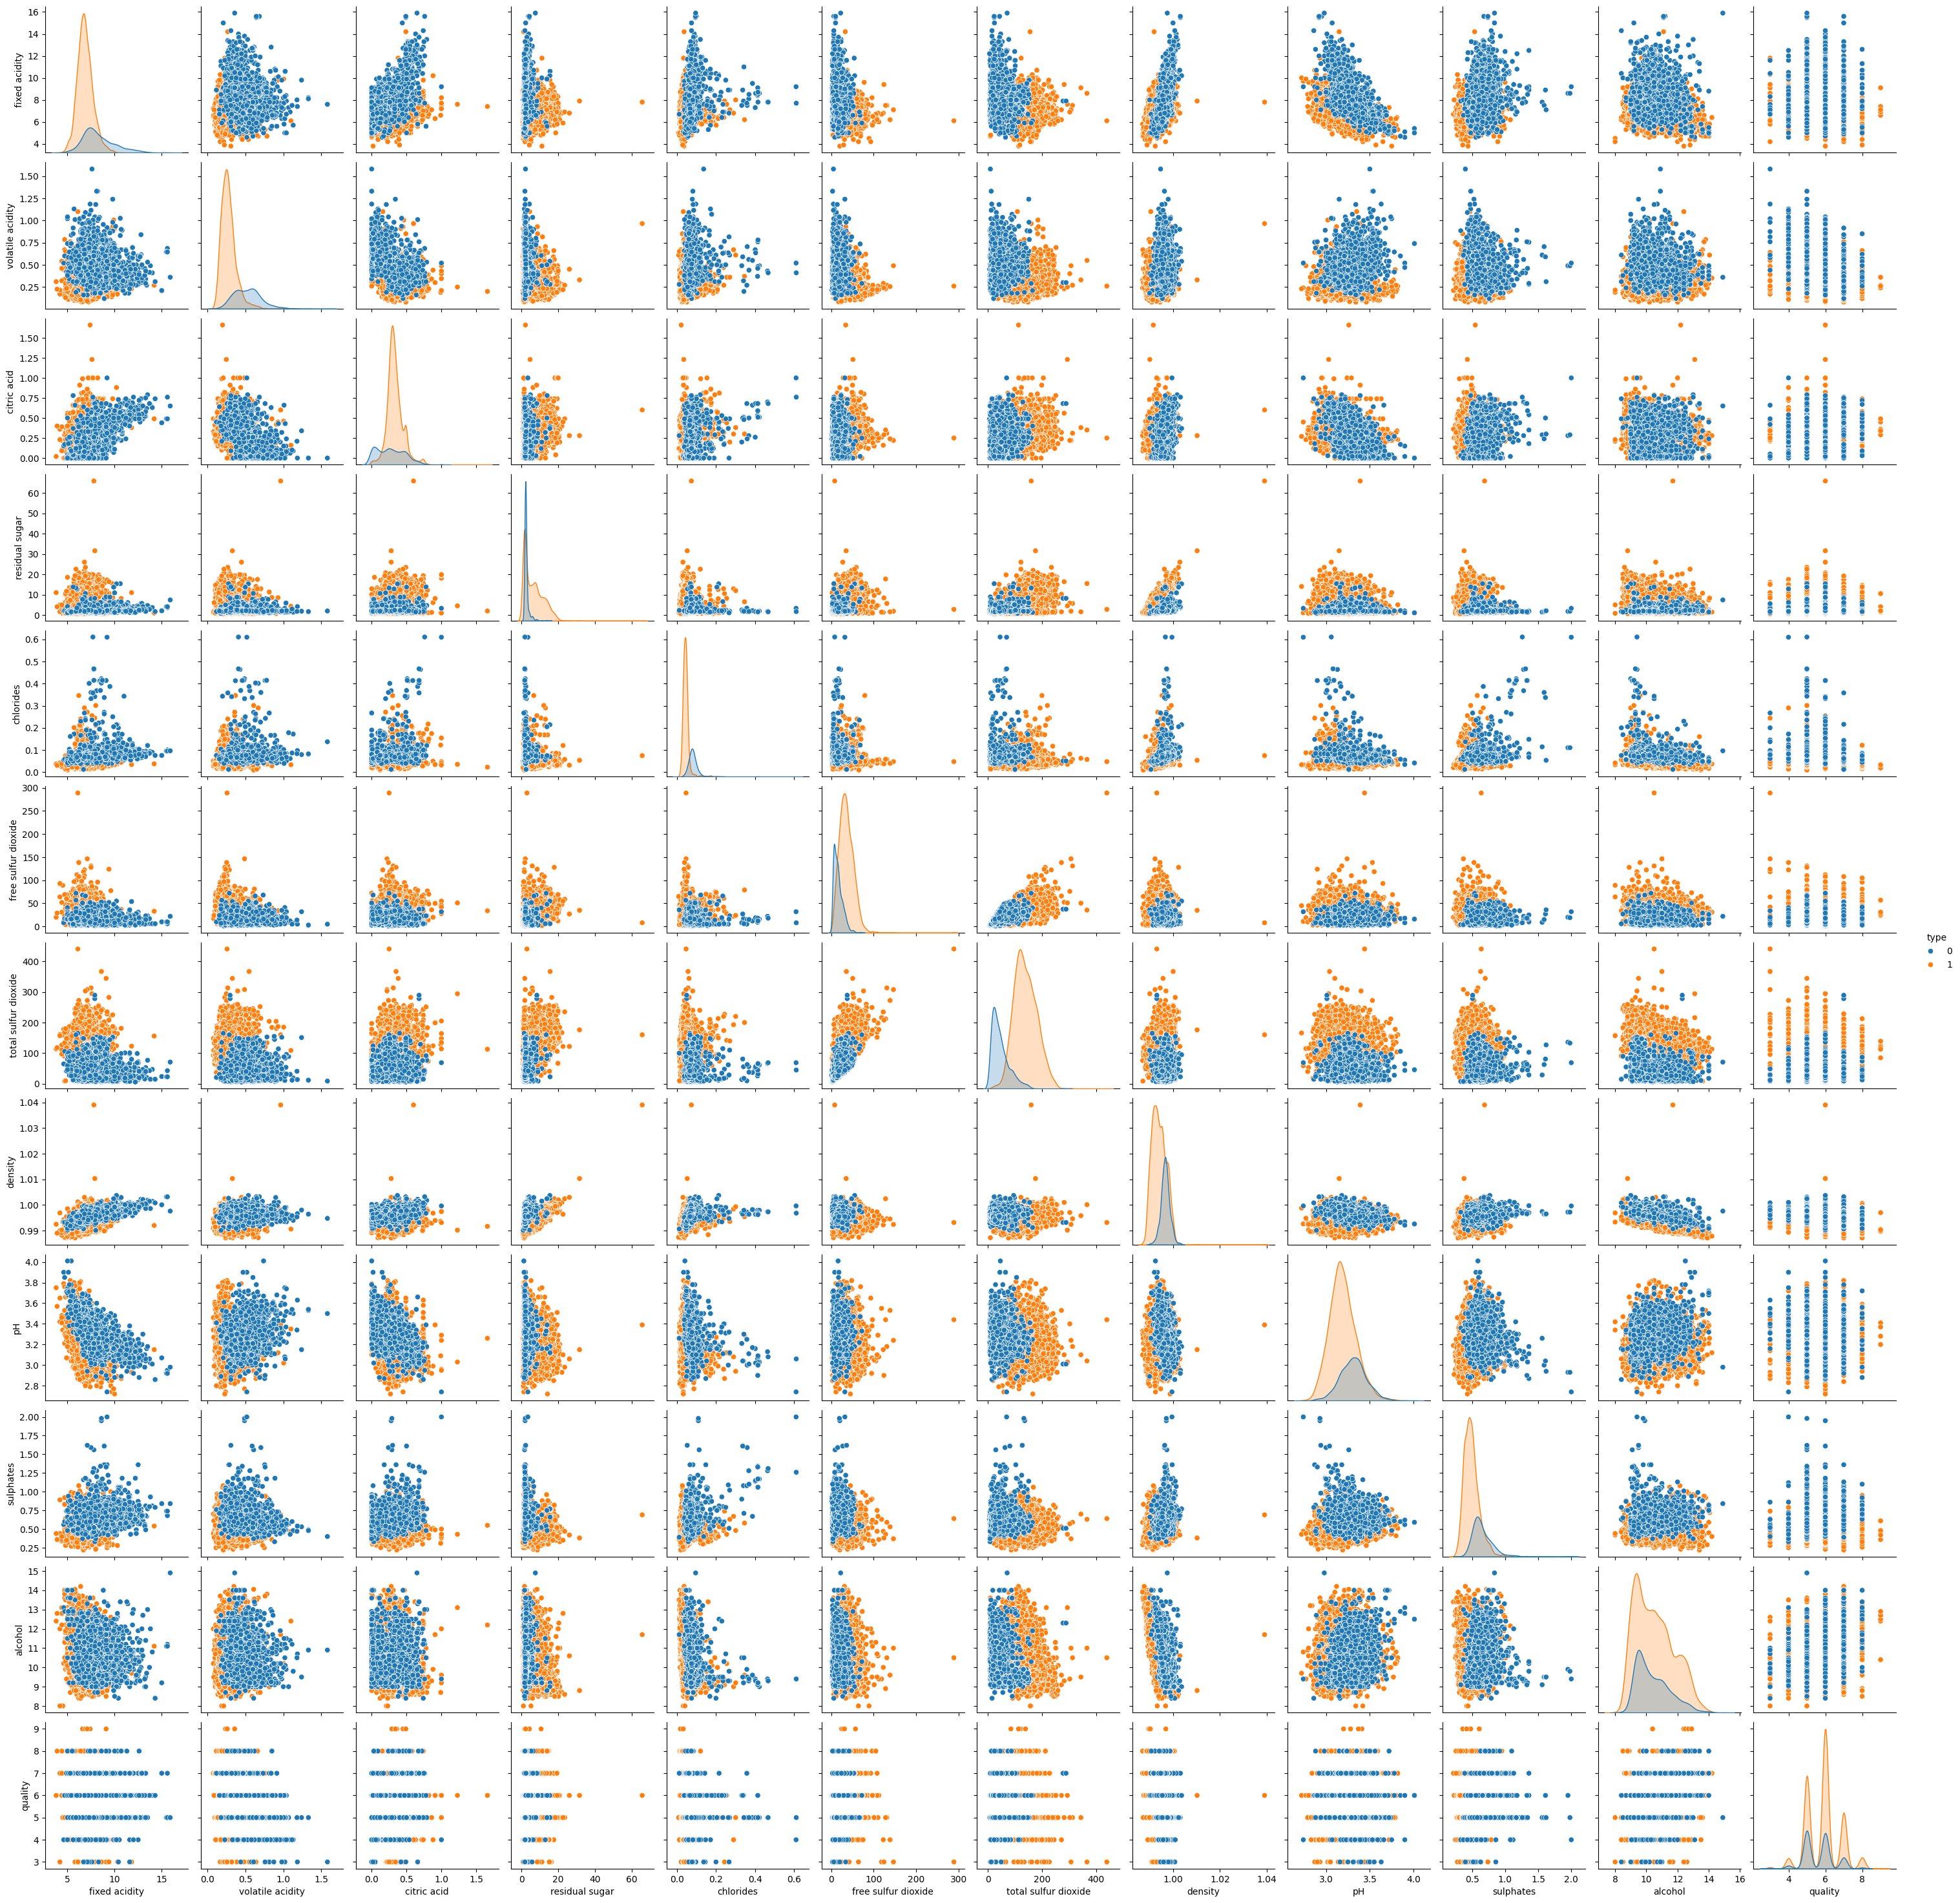

In [76]:
sns.pairplot(wine , hue = 'type')

<Axes: >

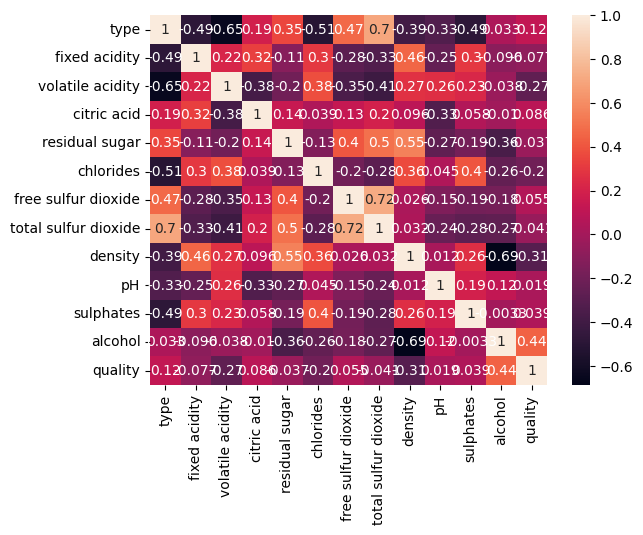

In [75]:
sns.heatmap(wine.corr() , annot = True)

In [44]:
wine_filled = wine.fillna(wine.mean())

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_filled.drop('type', axis=1))


In [46]:
import numpy as np
covarience_matrix = np.cov(wine_scaled.T)

In [47]:
covarience_matrix

array([[ 1.00015394,  0.21995179,  0.32339831, -0.1122366 ,  0.29832757,
        -0.28328082, -0.32945956,  0.45901197, -0.25172162,  0.30027141,
        -0.09557433, -0.07697893],
       [ 0.21995179,  1.00015394, -0.37781694, -0.19660781,  0.37717969,
        -0.35310905, -0.41476972,  0.27114848,  0.26032309,  0.22534806,
        -0.03822085, -0.26587905],
       [ 0.32339831, -0.37781694,  1.00015394,  0.14247313,  0.03931562,
         0.13344672,  0.1951784 ,  0.09632231, -0.32840469,  0.05757267,
        -0.01043224,  0.08571235],
       [-0.1122366 , -0.19660781,  0.14247313,  1.00015394, -0.12890662,
         0.40330361,  0.49578046,  0.55257189, -0.26675823, -0.18574496,
        -0.35971135, -0.03682513],
       [ 0.29832757,  0.37717969,  0.03931562, -0.12890662,  1.00015394,
        -0.19500773, -0.27959052,  0.36263604,  0.04476053,  0.39513374,
        -0.25688392, -0.20084923],
       [-0.28328082, -0.35310905,  0.13344672,  0.40330361, -0.19500773,
         1.00015394,  

In [48]:
eigen_values, eigen_vectors = np.linalg.eig(covarience_matrix)

In [49]:
eigen_values

array([3.04188276, 2.65011823, 1.64043263, 1.06894429, 0.03307264,
       0.84062404, 0.22787609, 0.29950577, 0.6608744 , 0.45821875,
       0.56366637, 0.51663132])

In [50]:
 eigen_vectors

array([[-0.25805261, -0.2611752 ,  0.4665996 ,  0.14520756, -0.33460915,
         0.16555327,  0.27592254, -0.27323376, -0.03211476,  0.42381608,
        -0.39440197, -0.00552279],
       [-0.39506672, -0.10474352, -0.28010185,  0.08000685, -0.0824268 ,
         0.14733799, -0.13926772,  0.49450952,  0.38031684, -0.12606946,
        -0.44437499, -0.31249251],
       [ 0.1458476 , -0.14407994,  0.58849752, -0.05529299,  0.00117332,
        -0.23575318, -0.22803143,  0.33171417, -0.36300824, -0.24734091,
        -0.04346489, -0.44286288],
       [ 0.31869794, -0.34315419, -0.0745724 , -0.11166524, -0.45147075,
         0.50758061, -0.00519176, -0.20724712,  0.06299452, -0.48814696,
         0.0968672 , -0.08102717],
       [-0.31368614, -0.26926431,  0.04676602, -0.16531259, -0.04332847,
        -0.39360728,  0.19301949, -0.23915784,  0.42642021, -0.0433812 ,
         0.47416938, -0.37386181],
       [ 0.42279989, -0.11191999, -0.09790435, -0.30272623, -0.00098708,
        -0.2477034 , -

In [51]:
pc = eigen_vectors[0:3]

In [56]:
transformed_data = wine_scaled.dot(pc.T)
new_data = pd.DataFrame(transformed_data , columns =['pc1','pc2','pc3'])
new_data['target'] = wine['type'].values

In [57]:
new_data.head()

pc1       pc2       pc3  target
0  1.053657  1.456484  0.910539       1
1  0.445638  0.456185 -0.032749       1
2  0.009156  0.015712  0.571002       1
3  0.496841  0.431315 -0.126644       1
4  0.496841  0.431315 -0.126644       1

In [58]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(new_data.drop('target' , axis =1) , new_data['target'] , test_size = 0.2 , random_state =40)

In [59]:
X_train.shape

(5197, 3)

In [60]:
X_test.shape

(1300, 3)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)

In [62]:
y_predict

array([0, 0, 1, ..., 1, 0, 1])

In [71]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
print(recall_score(y_test , y_predict , average ='micro'))
print(precision_score(y_test , y_predict ,  average ='micro'))
print(f1_score(y_test, y_predict , average ='micro'))
k = accuracy_score(y_test , y_predict)
k

0.8930769230769231
0.8930769230769231
0.8930769230769231


0.8930769230769231

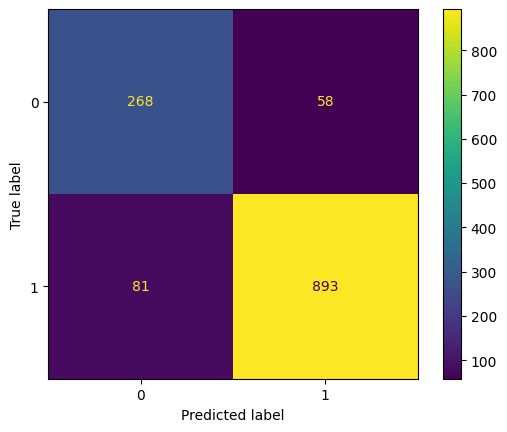

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
confusion_matrix(y_test , y_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)